Census Income Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
columns = ["age", "workClass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship", "race", "sex", 
           "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

df = pd.read_csv('adult.data', names = columns)

In [3]:
df.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workClass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.columns

Index(['age', 'workClass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
cat_col=[i for i in df.columns if df[i].dtype=='object']
num_col=[i for i in df.columns if df[i].dtype != 'object']

In [9]:
num_col

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [10]:
cat_col

['workClass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [11]:
for i in cat_col:
    uniquee=df[i].unique()
    print(f"unique value in {i}  is  : {uniquee}")
    
    nuiquee =df[i].nunique()
    print()
    print(f"total no. of unique value in {i}  is  : {nuiquee}")
    
    
    print('*'*80)

unique value in workClass  is  : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

total no. of unique value in workClass  is  : 9
********************************************************************************
unique value in education  is  : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

total no. of unique value in education  is  : 16
********************************************************************************
unique value in marital-status  is  : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

total no. of unique value in marital-status  is  : 7
********************************************************************************
unique value in occupation  is  : [' Adm-clerical' ' Exec-mana

# working on workclass column

In [12]:
df['workClass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:
df[df['workClass']== ' ?'].shape[0]

1836

In [14]:
df[df['occupation']== ' ?'].shape[0]

1843

In [15]:
df[(df['workClass']== ' ?') & (df['occupation']== ' ?')].shape[0]

1836

In [16]:
#  In 1836 rows both workclass and occupation column has question mark(null value) (?)

In [17]:
df['education-num'].nunique()

16

In [18]:
df['education'].nunique()

16

In [19]:
# replacing '?' with np.nan

df['workClass']=df['workClass'].replace(' ?' ,np.nan)
df['occupation']=df['occupation'].replace(' ?' ,np.nan)
df['native-country']=df['native-country'].replace(' ?' ,np.nan)

In [20]:
df[df['workClass']== ' ?'].shape[0]

0

In [21]:
df[df['native-country']== ' ?'].shape[0]

0

In [22]:
df.isnull().sum()

age                  0
workClass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

# Salary

C:\Users\altam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

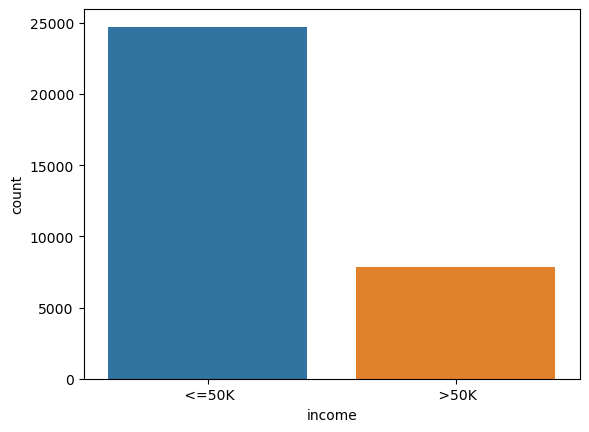

In [23]:
sns.countplot(df['income'])

C:\Users\altam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

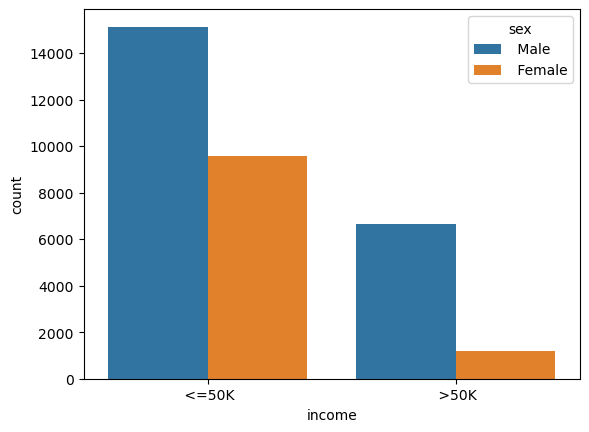

In [24]:
sns.countplot(df['income'],hue=df['sex'])

# Age

Text(0.5, 1.0, 'Distribution of age')

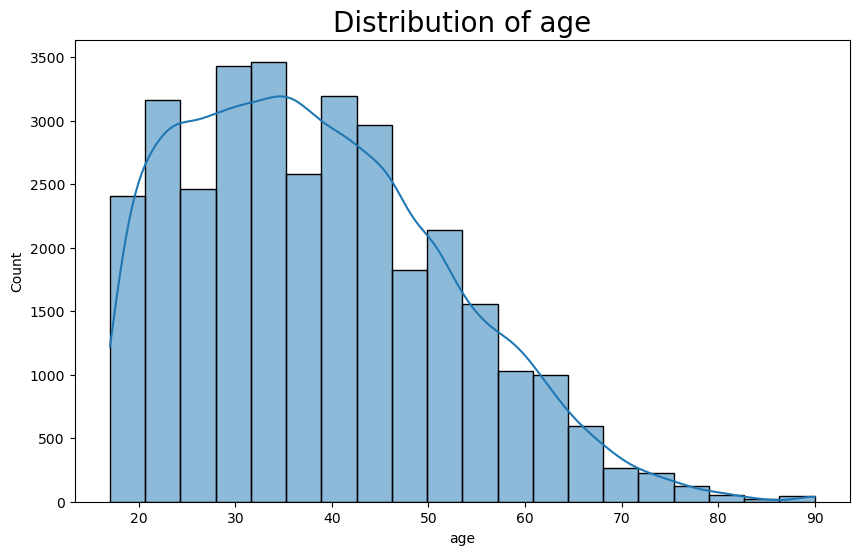

In [25]:
# age distribution
plt.figure(figsize=(10,6))
           
sns.histplot(df['age'],bins=20,kde=True)
plt.title('Distribution of age',fontsize=20)

In [26]:
# age column is left skewed
# people with max age group 30
# most of the population is b/w 20 -50 age group

<AxesSubplot:xlabel='age', ylabel='Count'>

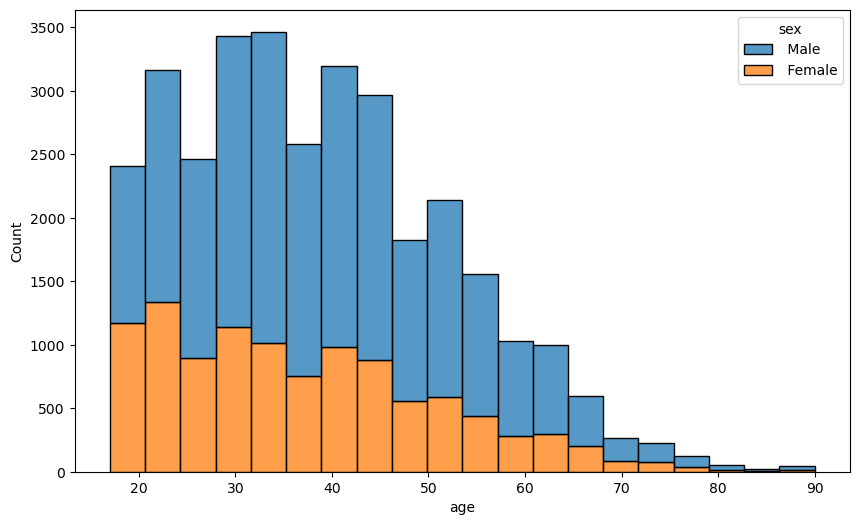

In [27]:
plt.figure(figsize=(10,6))
           
sns.histplot(data=df ,x='age' , hue ='sex',bins=20,multiple="stack")

In [28]:
# in every age gorup there are less female than male

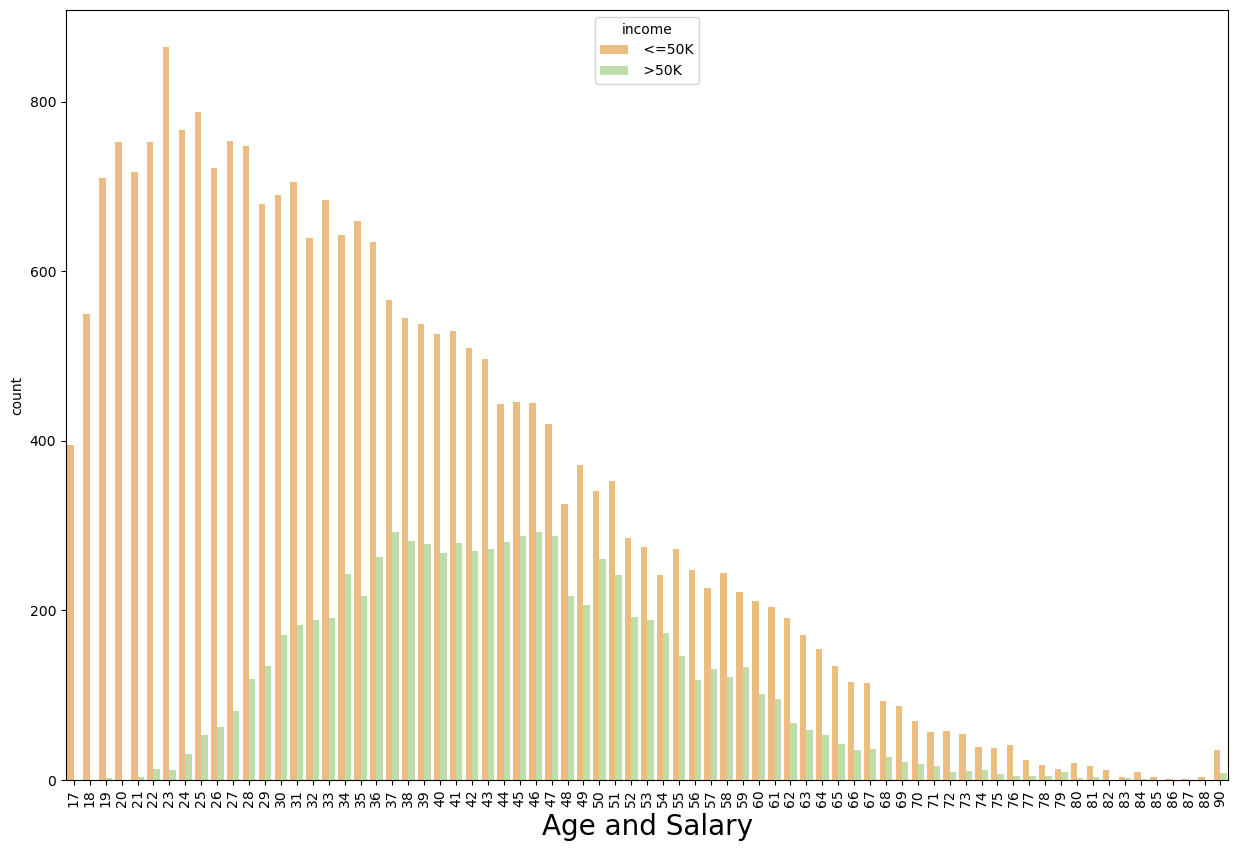

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='age',palette = "Spectral",hue='income')
plt.xlabel('Age and Salary',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

finding
for more the 50k earner

as our Age is increase , the individual who are earning more than 50k is also inc. , but after a certain age , salary dec. with age inc.
for less then 50k earner

b/w the age of 17-30 there are more no. of people who are earning less the 50k
but as the ages inc. the no. of earner who earn less than 50k is dec

# work class

In [30]:
df.groupby('workClass')['hours-per-week'].mean().sort_values(ascending=False)

workClass
 Self-emp-inc        48.818100
 Self-emp-not-inc    44.421881
 Federal-gov         41.379167
 Local-gov           40.982800
 Private             40.267096
 State-gov           39.031587
 Without-pay         32.714286
 Never-worked        28.428571
Name: hours-per-week, dtype: float64

In [31]:
df['workClass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workClass, dtype: int64

Text(0.5, 0, 'Workclass')

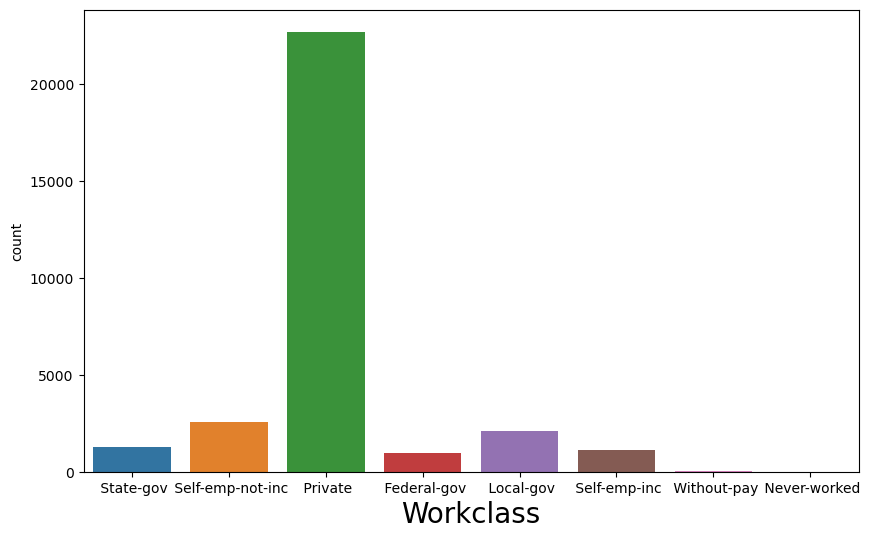

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='workClass')
plt.xlabel('Workclass',fontsize=20)

In [33]:
# most of the people are working in private sector
# there are very less no. of people in 'Withoutpay' and 'Never worked ' class

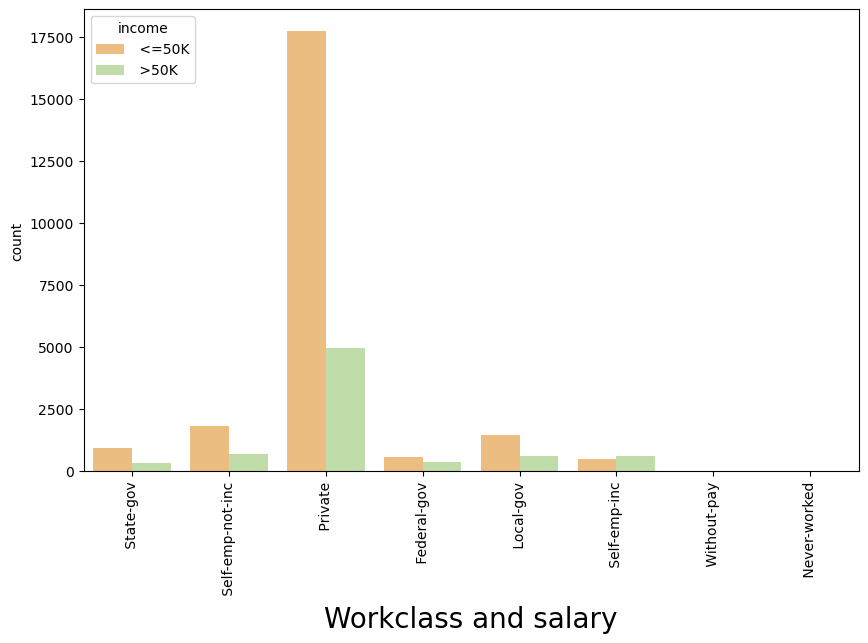

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='workClass',palette = "Spectral",hue='income')
#sns.color_palette("Paired")
sns.color_palette("rocket", as_cmap=True)
plt.xlabel('Workclass and salary',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

In [35]:
# most of the people working in private sector earn less than 50k
# in every sector(Workclass) most of the people earn less than 50k

# in self-emp-inc  column  many people earn more than 50k 

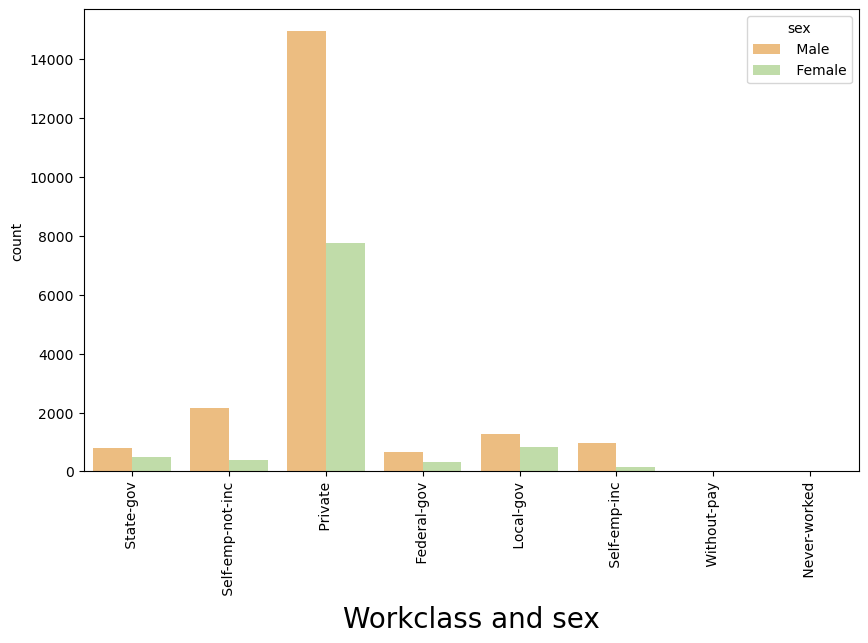

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='workClass',palette = "Spectral",hue='sex')
#sns.color_palette("Paired")
sns.color_palette("rocket", as_cmap=True)
plt.xlabel('Workclass and sex',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

# Education

In [37]:
df['education'].value_counts().sort_values(ascending=False)

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

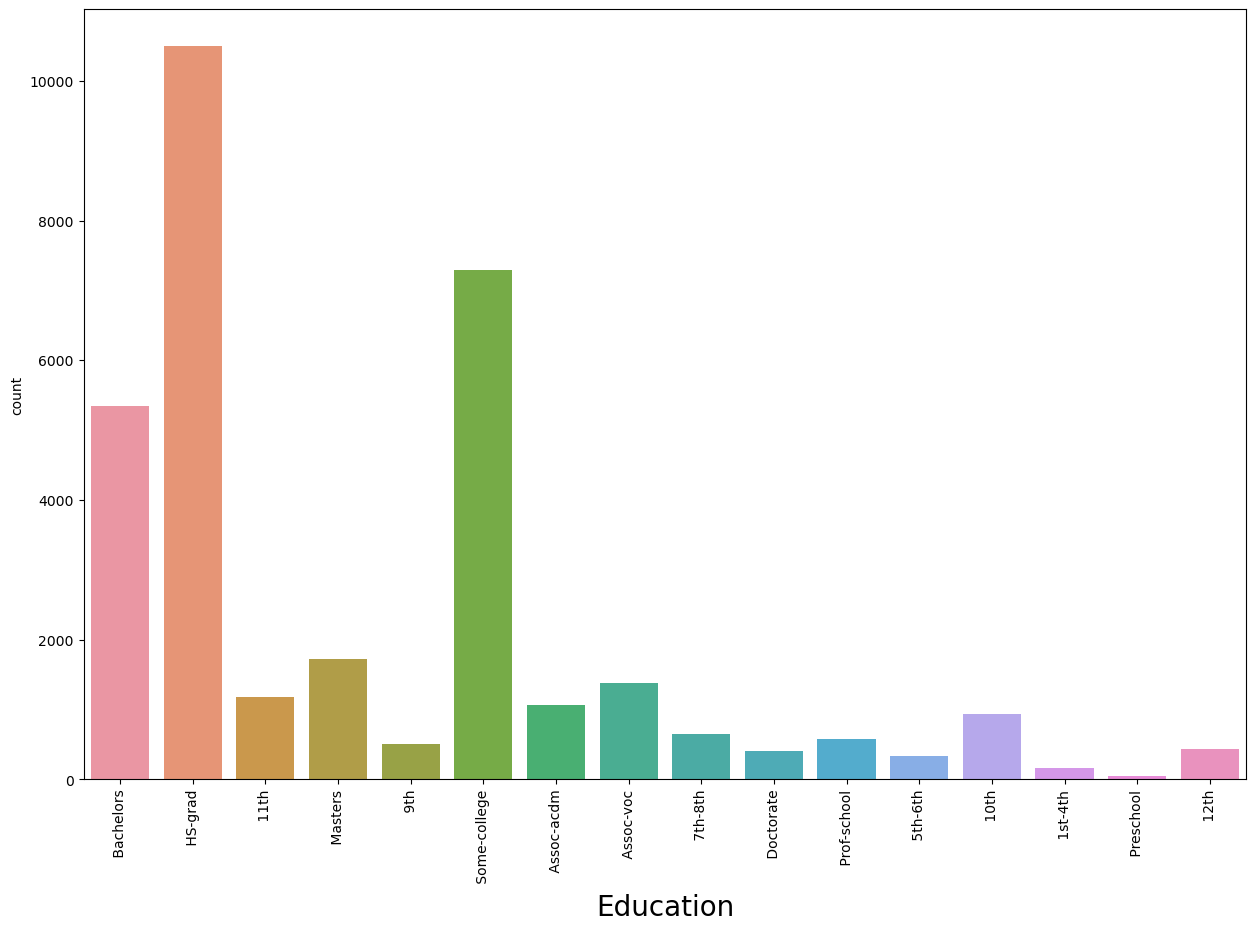

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='education')
plt.xlabel('Education',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

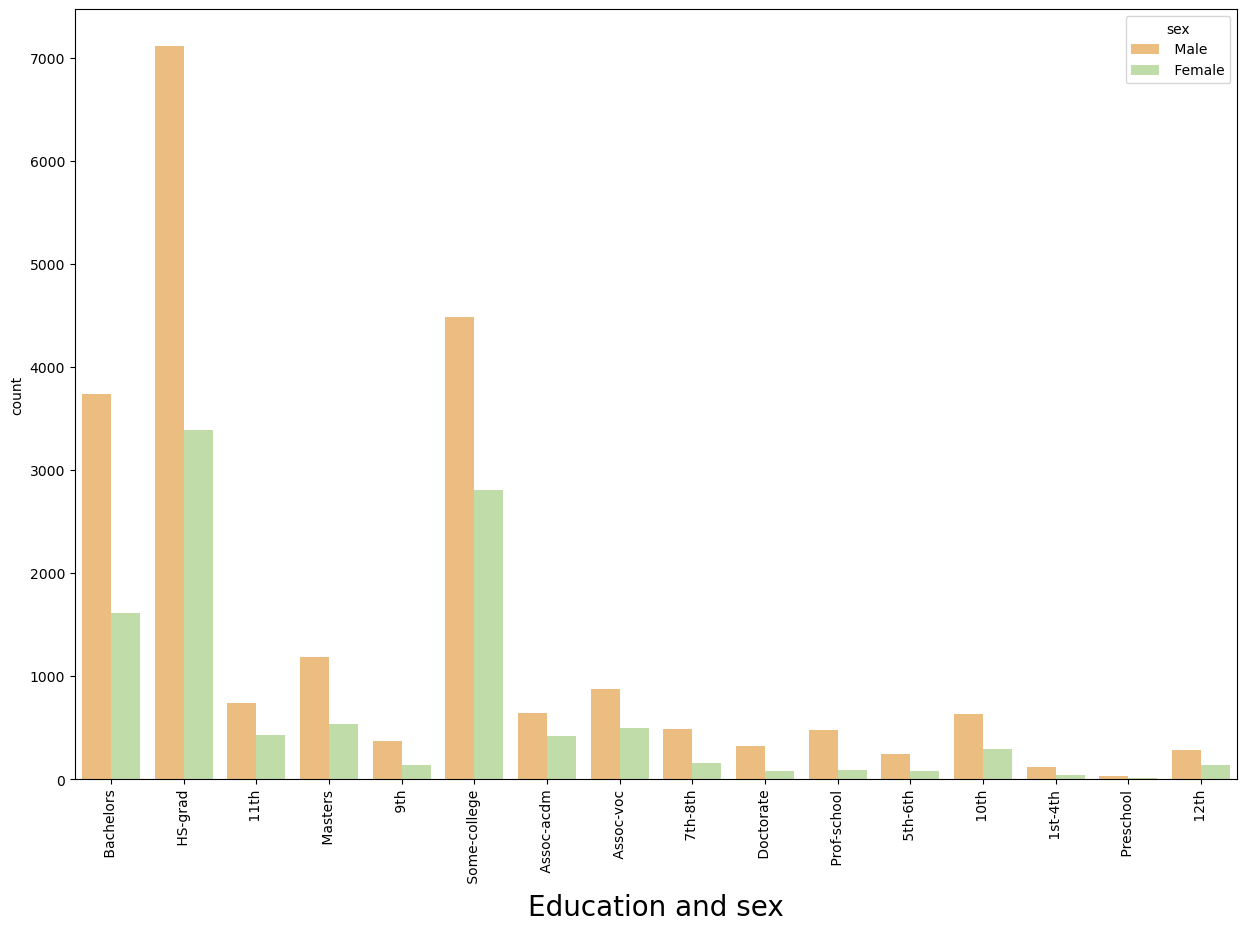

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='education',palette = "Spectral",hue='sex')
plt.xlabel('Education and sex',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

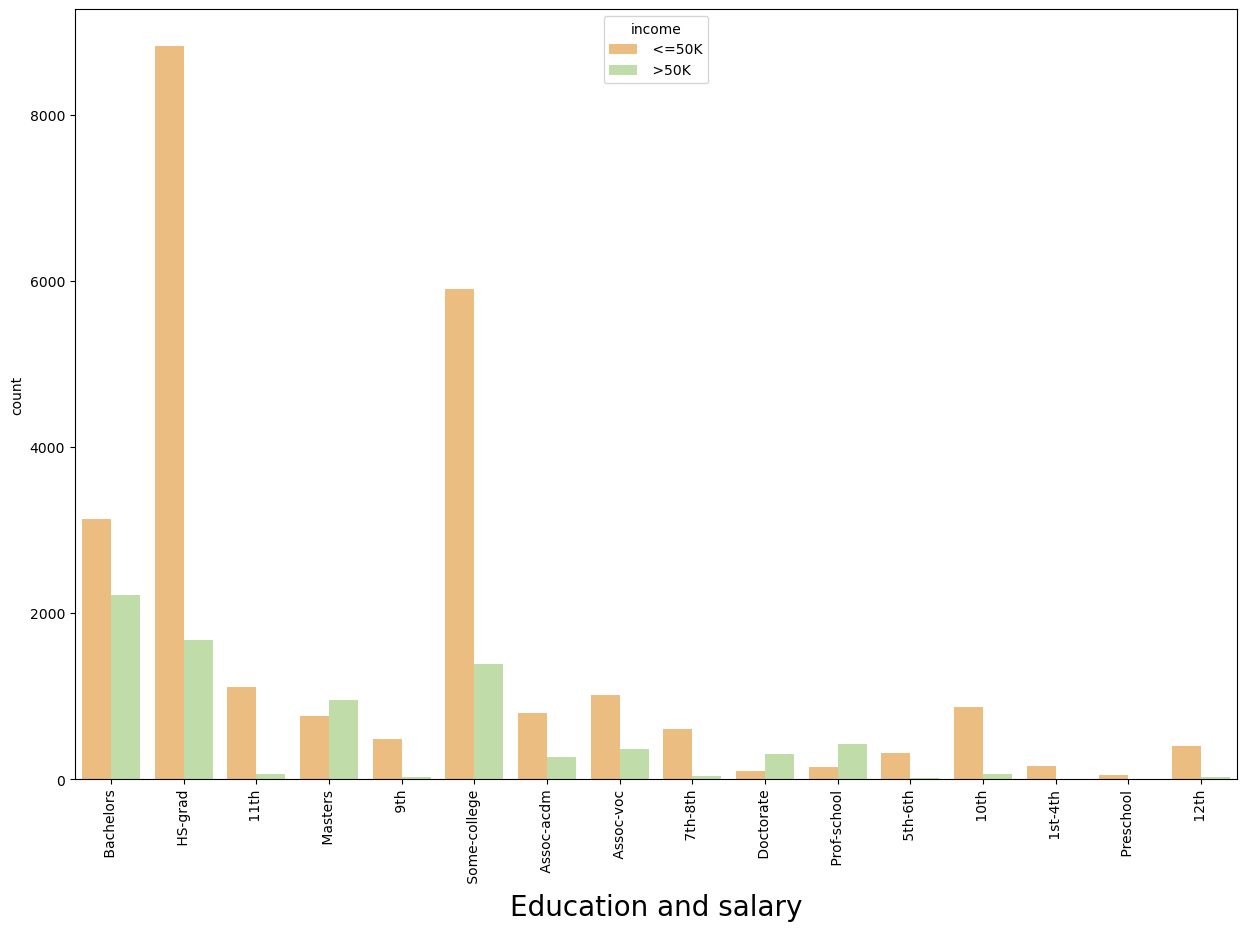

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='education',palette = "Spectral",hue='income')
plt.xlabel('Education and salary',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
# Individual with higher education qualification(Masters,Doctorate ,prof-school) -- these are earning more than 50k
# Indivdidual with lower education qualification earning less than 50 k

# Marital-status

marital-status:

marital status of an individual.
Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.
Married-civ-spouse,
Divorced,
Never-married,
Separated,
Widowed,
Married-spouse-absent,
Married-AF-spouse.

In [42]:
df['marital-status'].value_counts().sort_values(ascending=False)

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

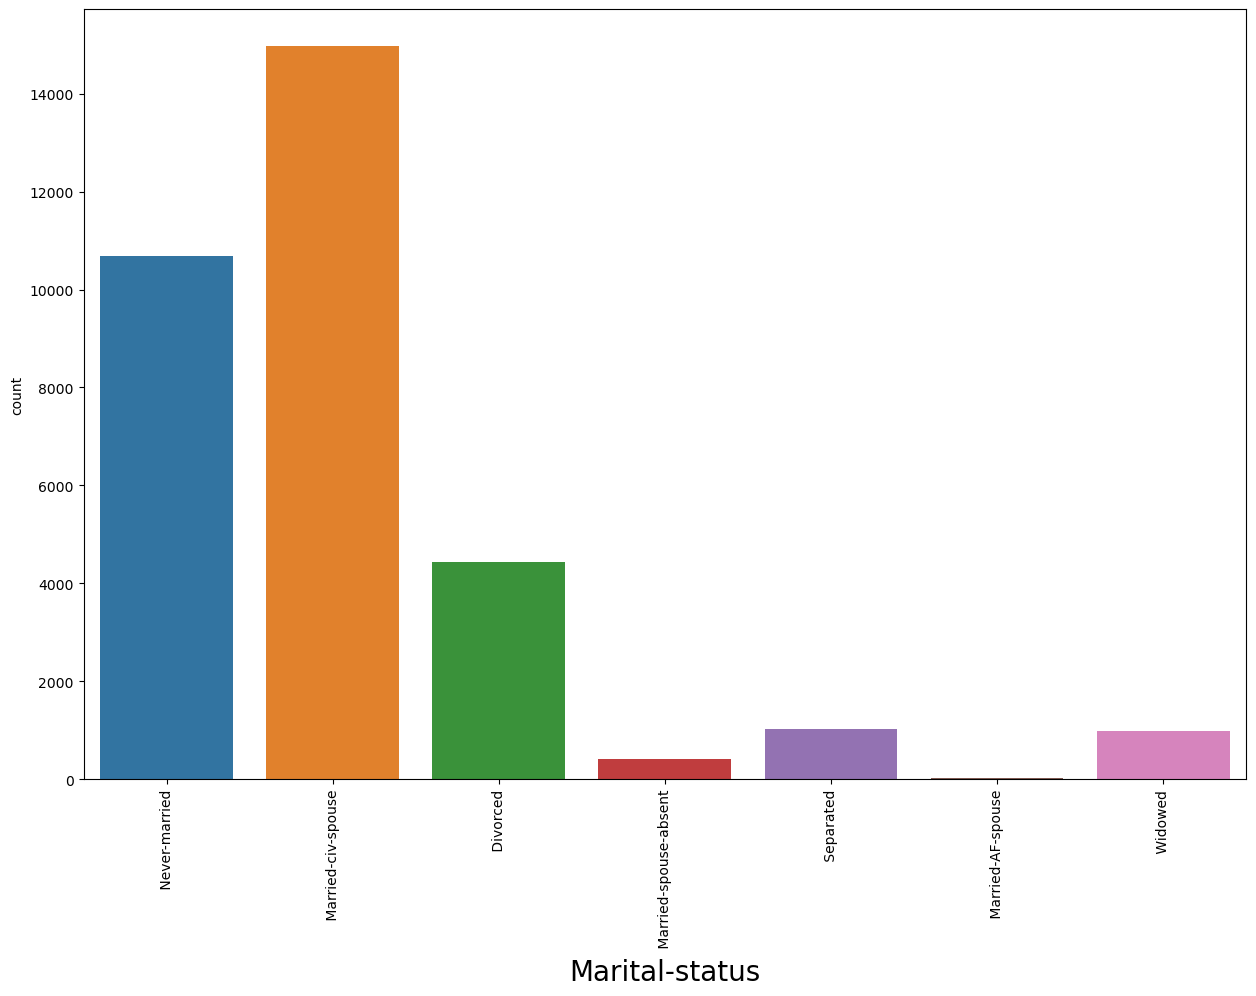

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='marital-status')
plt.xlabel('Marital-status',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

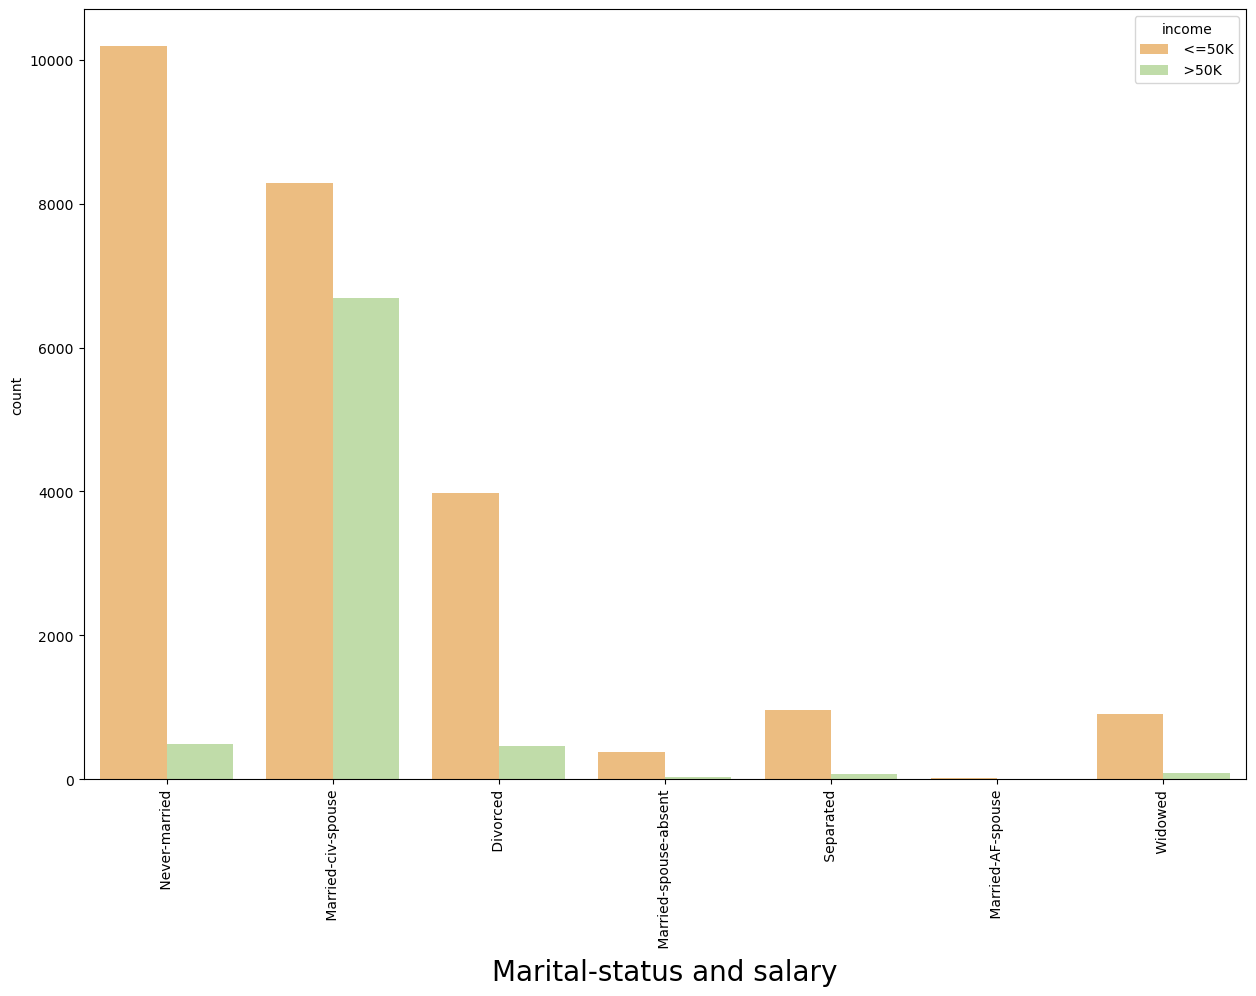

In [44]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='marital-status',palette = "Spectral",hue='income')
plt.xlabel('Marital-status and salary',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

# Occupation

In [45]:
df['occupation'].value_counts(ascending=False)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

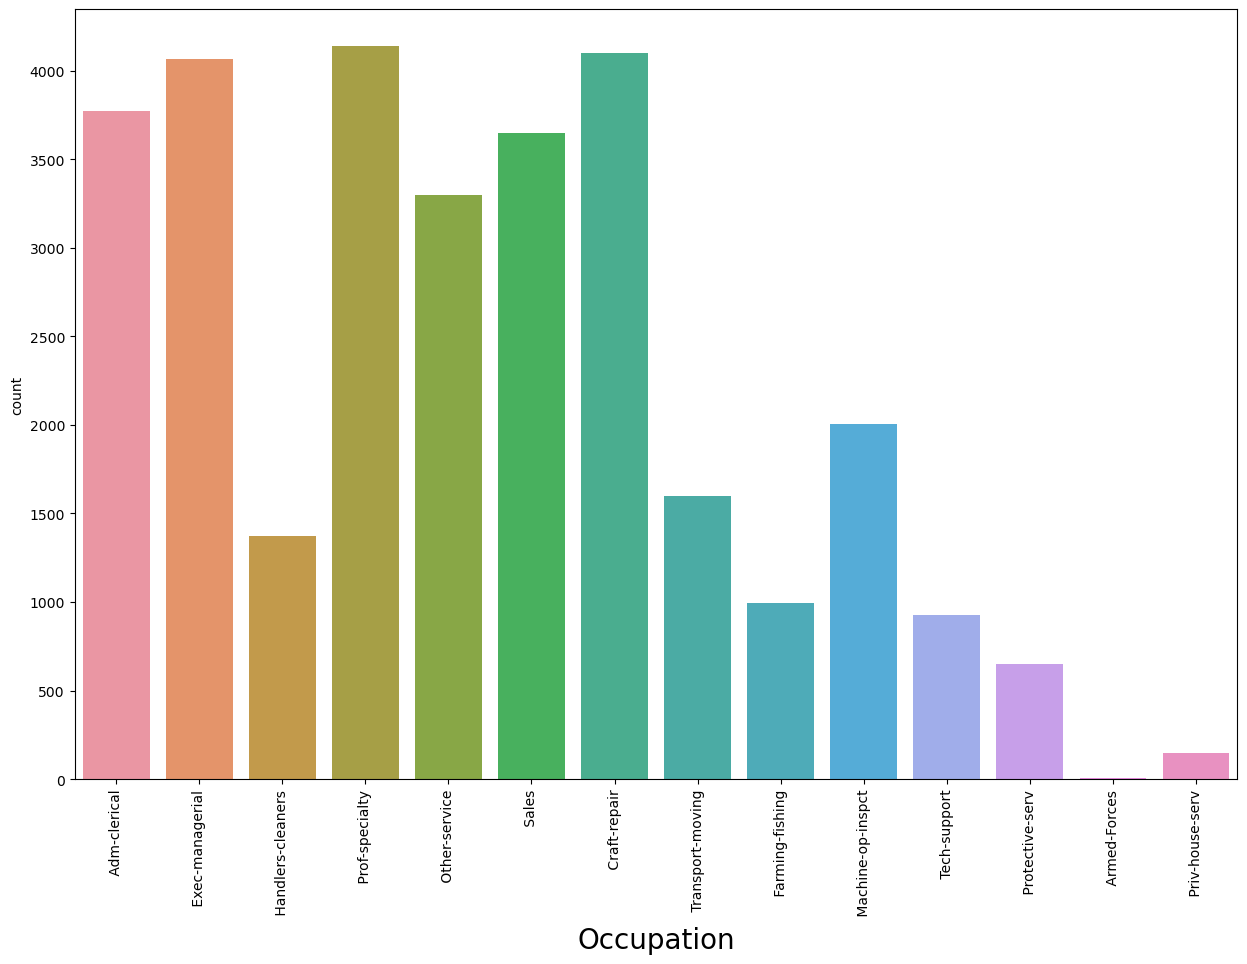

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='occupation')
plt.xlabel('Occupation',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

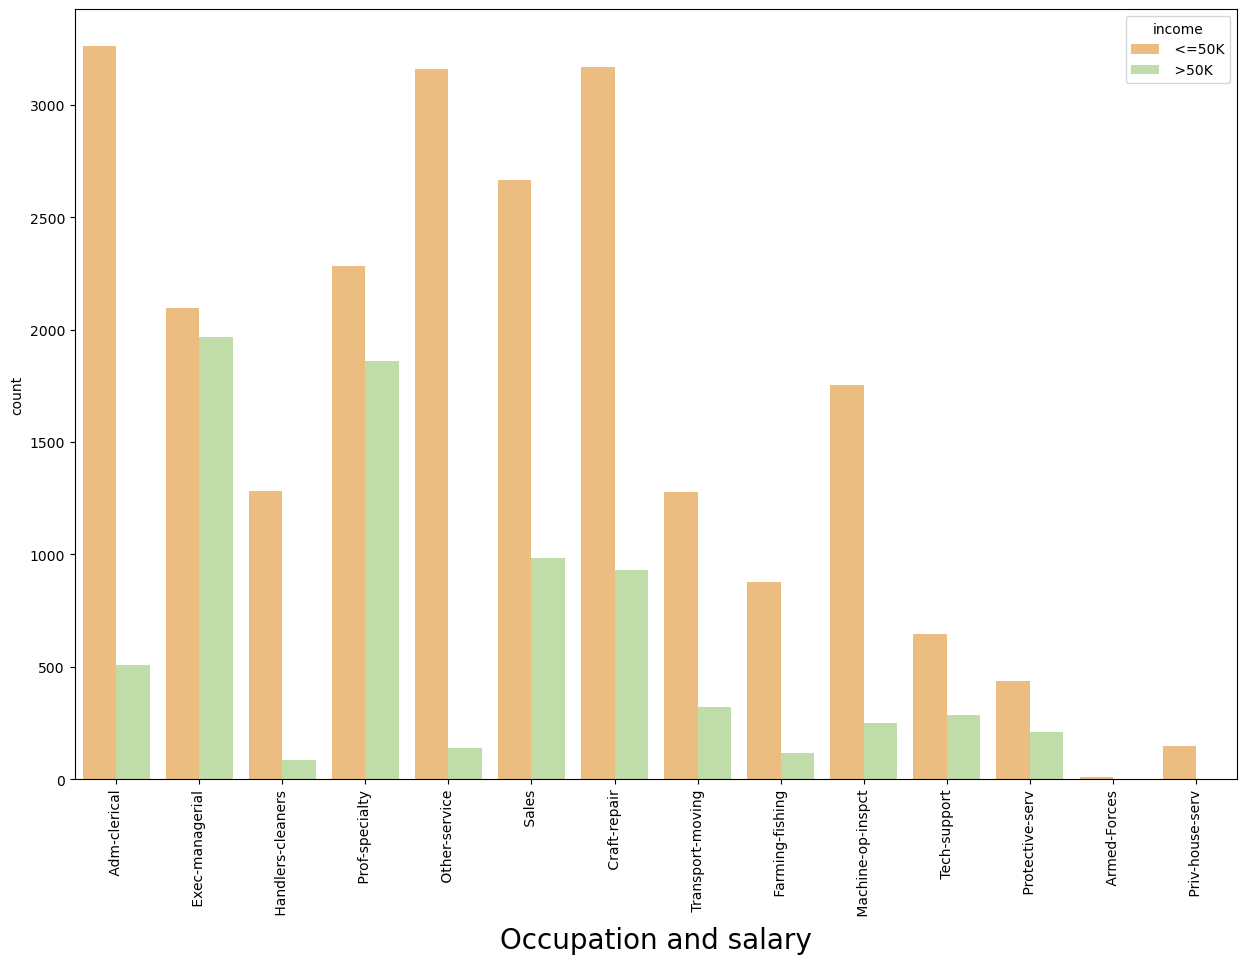

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='occupation',palette = "Spectral",hue='income')
plt.xlabel('Occupation and salary',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

# Relationship

In [48]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

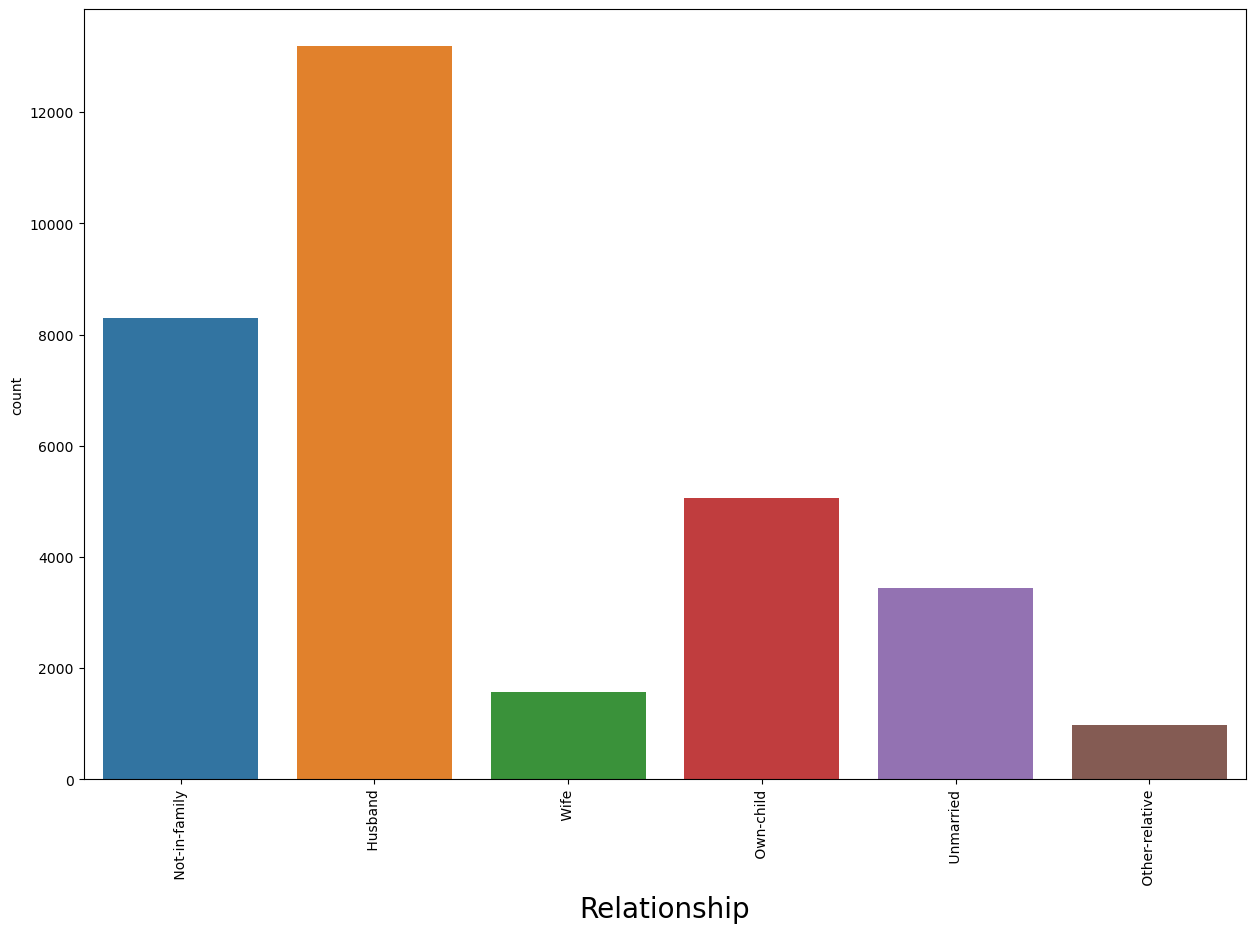

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='relationship')
plt.xlabel('Relationship',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

# Race

In [50]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

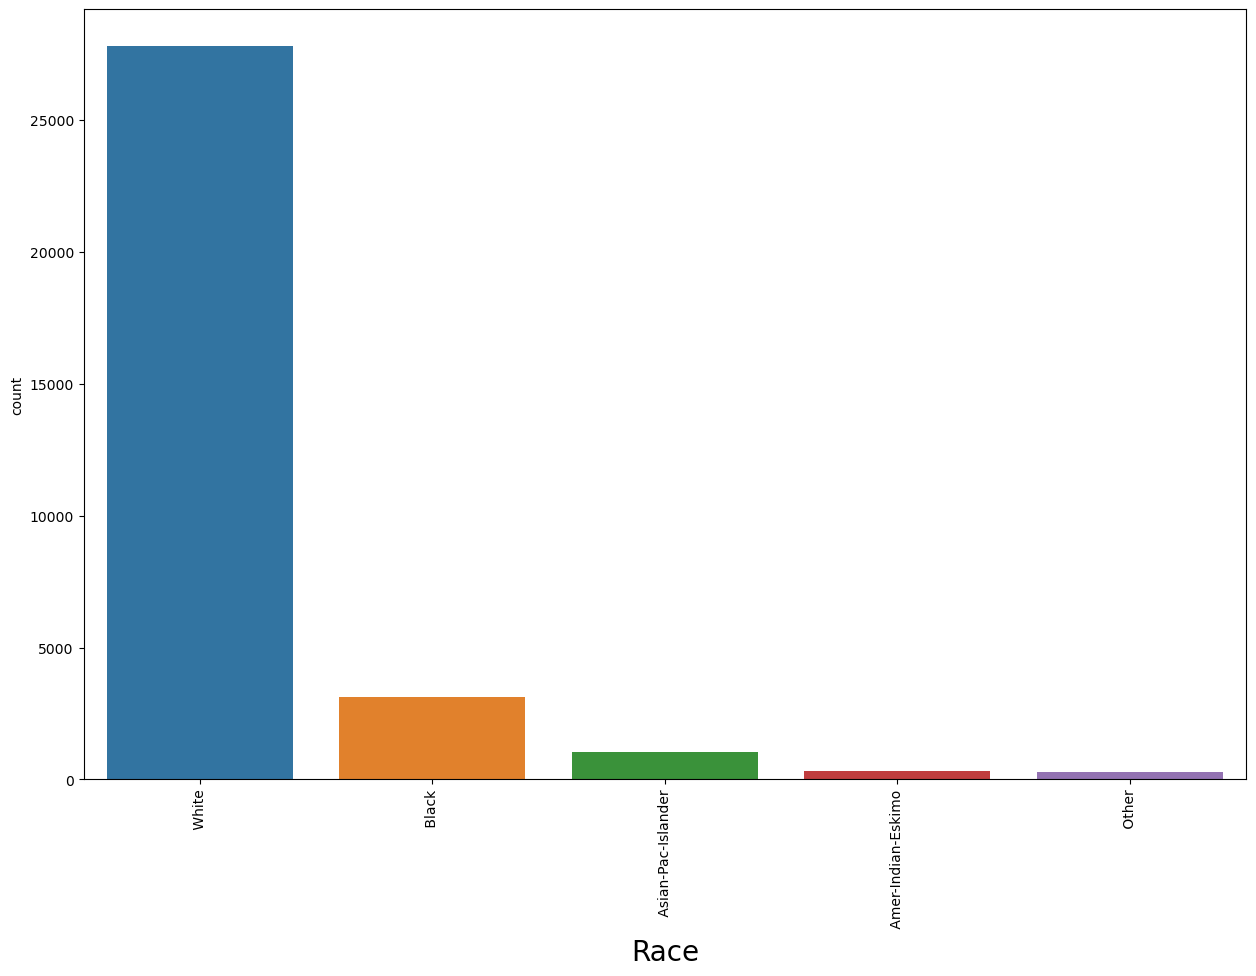

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='race')
plt.xlabel('Race',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

# Sex

In [52]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

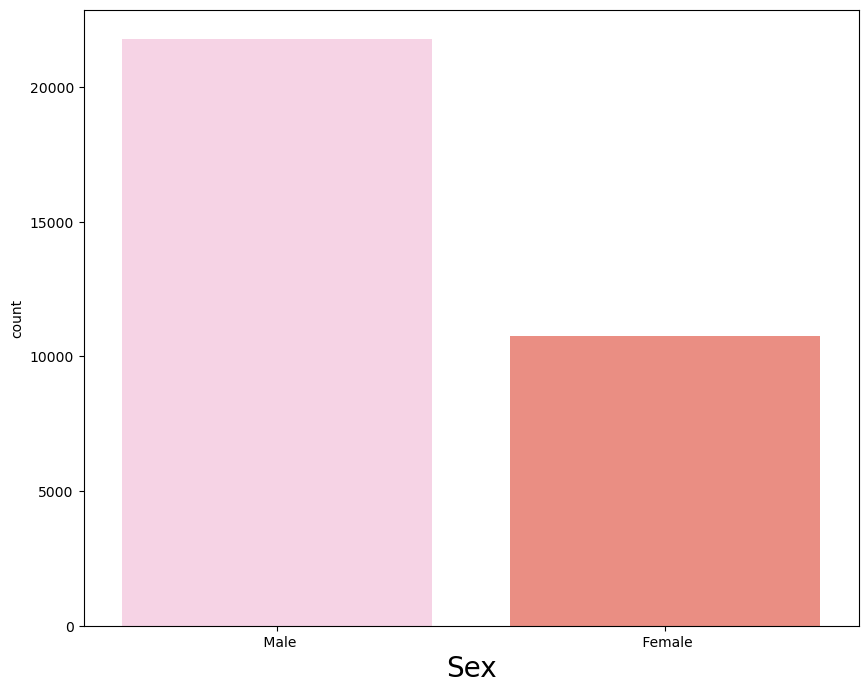

In [53]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='sex', palette = "Set3_r")
plt.xlabel('Sex',fontsize=20)

plt.show()


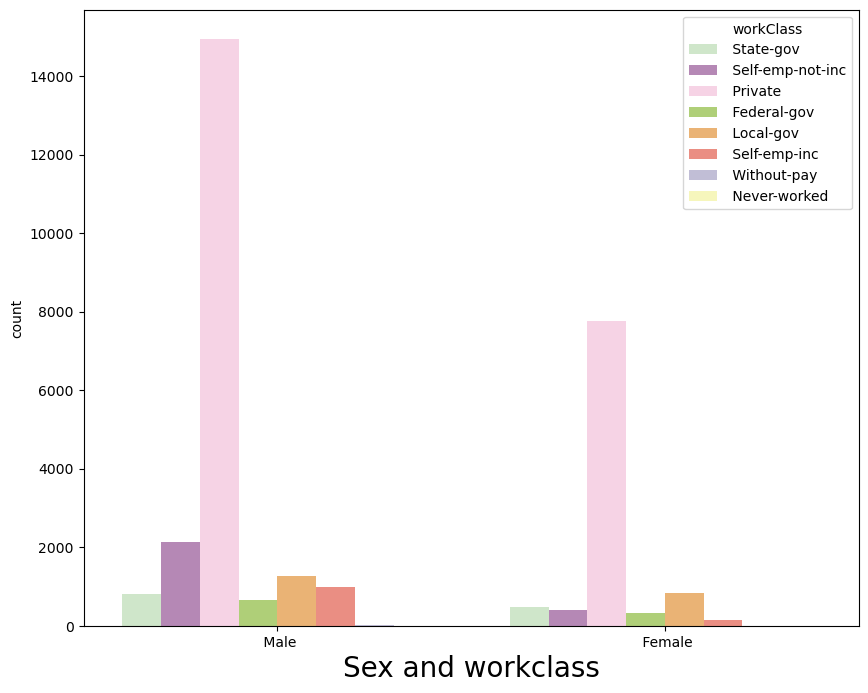

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='sex', palette = "Set3_r",hue='workClass')
plt.xlabel('Sex and workclass',fontsize=20)

plt.show()

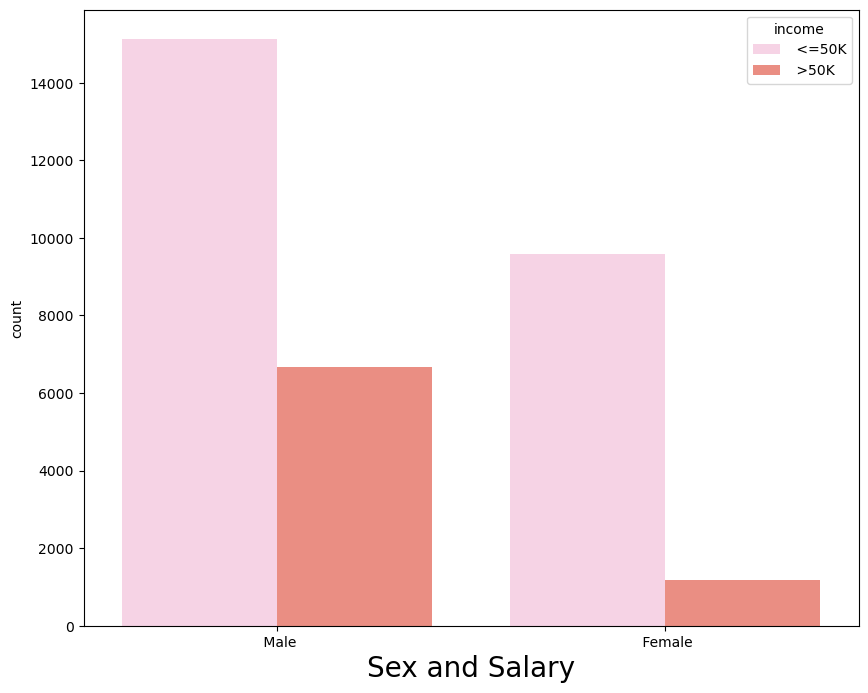

In [55]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='sex', palette = "Set3_r",hue='income')
plt.xlabel('Sex and Salary',fontsize=20)

plt.show()

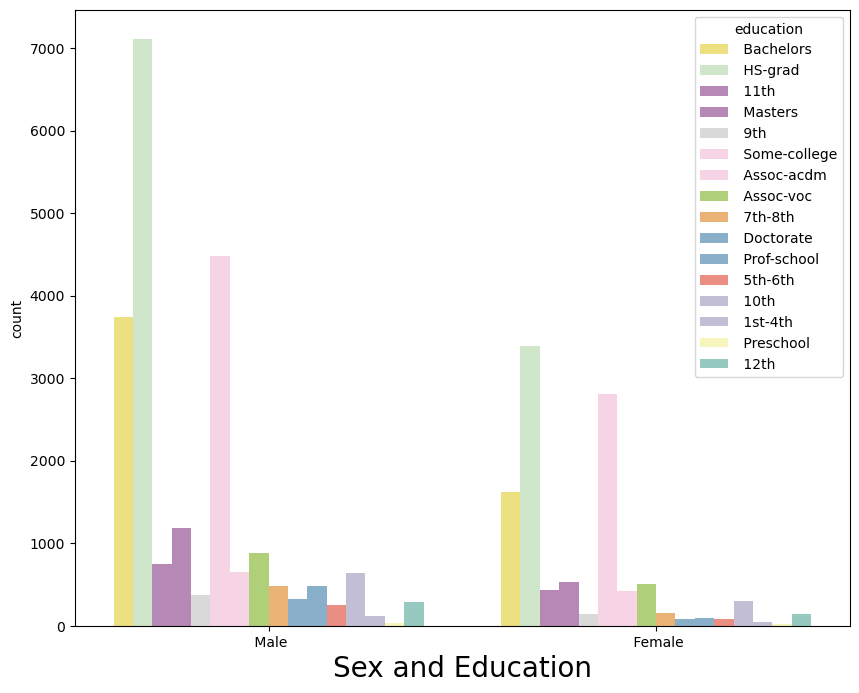

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='sex', palette = "Set3_r",hue='education')
plt.xlabel('Sex and Education',fontsize=20)

plt.show()


# Native - Country

In [57]:
df['native-country'].value_counts().head()

 United-States    29170
 Mexico             643
 Philippines        198
 Germany            137
 Canada             121
Name: native-country, dtype: int64

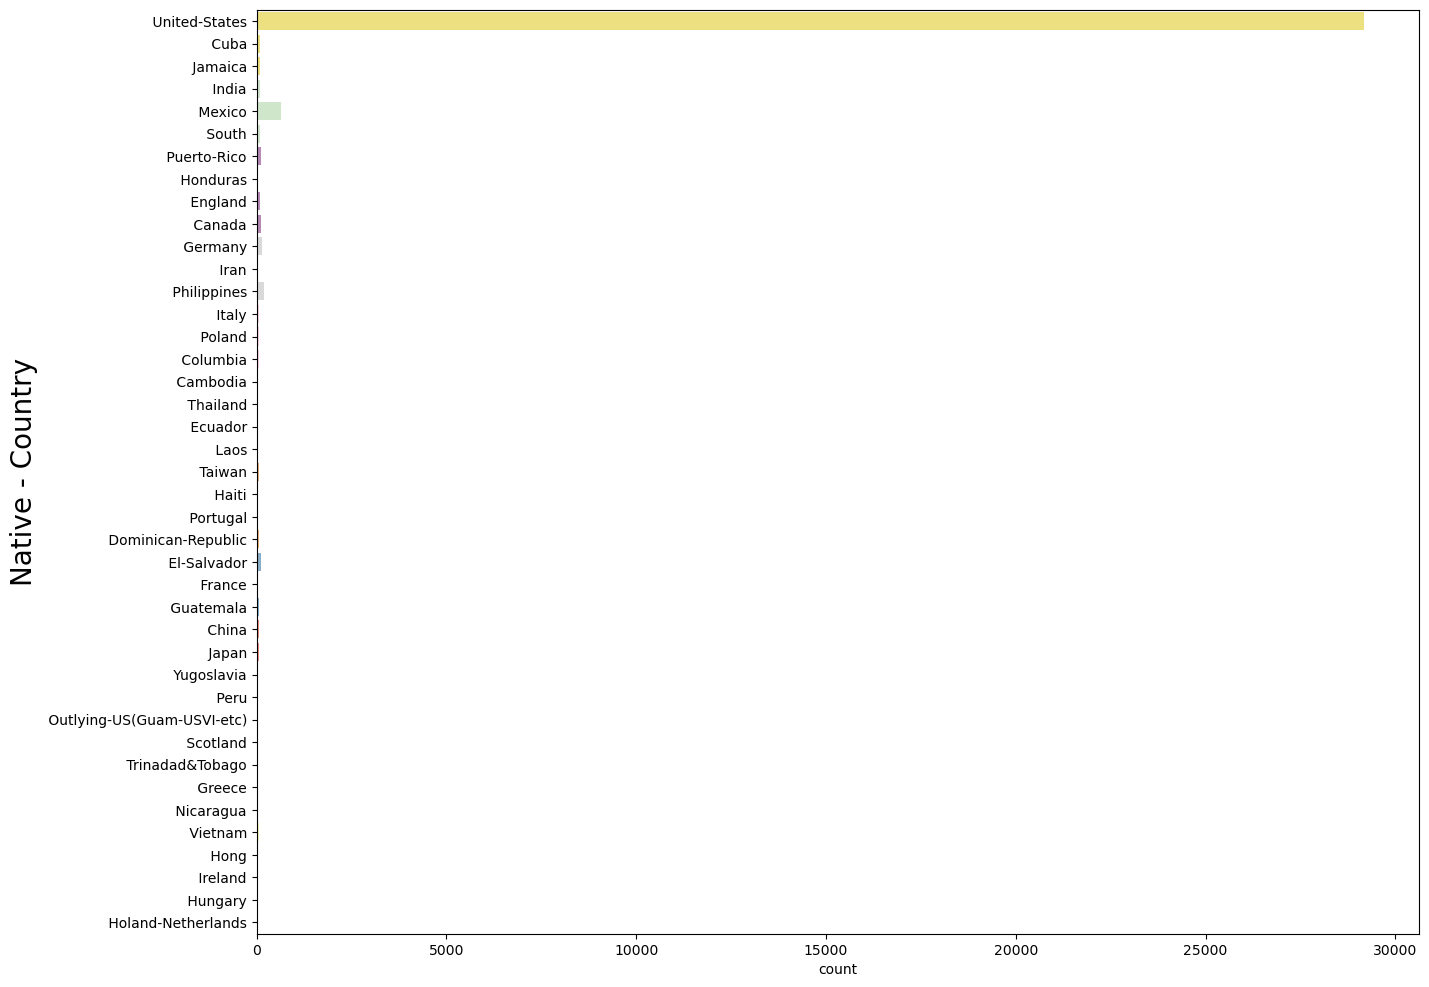

In [58]:
plt.figure(figsize=(15,12))
sns.countplot(data=df,y='native-country', palette = "Set3_r")
plt.ylabel('Native - Country',fontsize=20)

plt.show()

In [59]:
df.groupby('native-country')['fnlwgt'].count()

native-country
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                          643
 Nicaragua             

# Feature engineering

In [60]:
sallary = {' <=50K':0, ' >50K':1}

df['income'] = df['income'].apply(lambda x: sallary[x])


#df['Salary']= np.where(df.Salary == ' >50K', 1,0)

In [61]:
df.drop('education',axis=1,inplace=True)


# droppping education column

In [62]:
cat_col=[feature for feature in df.columns if df[feature].dtype == 'object']
num_col=[feature for feature in df.columns if df[feature].dtype != 'object']

# split into X,y

In [63]:
X =df.drop('income',axis=1)
y=df['income']

In [64]:
#numerical_column -- SIMPLE imputer  and standard scaler

# ordinal encoding - native column -- simpleimputer(most frequent),ordinal encoding , standard scaler

categorical_column = ['workClass','marital-status','occupation','relationship','race','sex']
ordinal_encod= ['native-country']
numer_column = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

In [65]:
# numerical pipeline

numerical_pipeline=Pipeline(steps=[
    ('impute',KNNImputer(n_neighbors=3,weights='distance')),
    ('scaler',StandardScaler(with_mean=False))
])

# categorical pipeline

categorical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('scaler',StandardScaler(with_mean=False))
])


# ordinal pipeline

ordianl_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder()),
    ('scaler',StandardScaler(with_mean=False))   
])

In [66]:
preprocessor =ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numer_column),
    ('categorical_pipeline',categorical_pipeline,categorical_column),
    ('ordianl_pipeline',ordianl_pipeline,ordinal_encod)
])

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [68]:
X_train=preprocessor.fit_transform(X_train)

In [69]:
from imblearn.combine import SMOTETomek


# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_final, y_final = smt.fit_resample(X_train, y_train)

C:\Users\altam\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


# model training

In [70]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [71]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

accuracy_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_final, y_final) # Train model

    # Make predictions
    y_train_pred = model.predict(X_final)
    y_test_pred = model.predict(X_test)



    # Test set performance
    model_test_accuracy,model_test_f1,model_test_precision,\
    model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    

    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    accuracy_list.append(model_test_accuracy)


    print('='*35)
    print('\n')

Random Forest
Model performance for Test set
- Accuracy: 0.8472
- F1 score: 0.6960
- Precision: 0.6692
- Recall: 0.7250
- Roc Auc Score: 0.8055
===================================


Decision Tree
Model performance for Test set
- Accuracy: 0.8108
- F1 score: 0.6262
- Precision: 0.5983
- Recall: 0.6569
- Roc Auc Score: 0.7583
===================================


Gradient Boosting
Model performance for Test set
- Accuracy: 0.8310
- F1 score: 0.7011
- Precision: 0.6113
- Recall: 0.8218
- Roc Auc Score: 0.8278
===================================
Logistic Regression
Model performance for Test set
- Accuracy: 0.8035
- F1 score: 0.6743
- Precision: 0.5617
- Recall: 0.8434
- Roc Auc Score: 0.8171
===================================


K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.7877
- F1 score: 0.6350
- Precision: 0.5424
- Recall: 0.7658
- Roc Auc Score: 0.7802
===================================


XGBClassifier
Model performance for Test set
- Accuracy: 0.8634
- F1 score: 0.7273
- Precision: 0.7011
- Recall: 0.7556
- Roc Auc Score: 0.8266
===================================


CatBoosting Classifier
Model performance for Test set
- Accuracy: 0.8689
- F1 score: 0.7306
- Precision: 0.7242
- Recall: 0.7371
- Roc Auc Score: 0.8239
===================================


Support Vector Classifier
Model performance for Test set
- Accuracy: 0.8058
- F1 score: 0.6756
- Precision: 0.5657
- Recall: 0.8383
- Roc Auc Score: 0.8169
===================================


AdaBoost Classifier
Model performance for Test set
- Accuracy: 0.8259
- F1 score: 0.6932
- Precision: 0.6028
- Recall: 0.8154
- Roc Auc Score: 0.8223
===================================

In [ ]:
Results = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy_score'])
Results.sort_values(by=["Accuracy_score"],ascending=False)

hyperparameters
learning_rate: This controls the step size shrinkage that is applied during each boosting iteration. The default value is 0.1. Lower values can prevent overfitting but require more boosting iterations to reach convergence.

n_estimators: This is the number of boosting iterations or trees to build. The default value is 100. Increasing this can lead to better performance but can also increase the risk of overfitting.

max_depth: This sets the maximum depth of each tree. The default value is 6. Increasing this can lead to more complex models that may overfit, while decreasing it can lead to underfitting.

subsample: This controls the fraction of observations to be used for building each tree. The default value is 1. Lower values can help prevent overfitting, while higher values can improve model performance.

colsample_bytree: This controls the fraction of features to be used for building each tree. The default value is 1. Lower values can help prevent overfitting, while higher values can improve model performance.

gamma: This is the minimum loss reduction required to make a split. The default value is 0. Increasing this can lead to more conservative models that prune unnecessary splits, while decreasing it can lead to overfitting.

reg_alpha: This is L1 regularization term on weights. The default value is 0. Increasing this can help prevent overfitting by shrinking the size of the weights.

reg_lambda: This is L2 regularization term on weights. The default value is 1. Increasing this can help prevent overfitting by shrinking the magnitude of the weights.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define XGBClassifier model
xgb_model = XGBClassifier()

# Define hyperparameters to tune
params = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 500, 1000]
}

# Use GridSearchCV to tune hyperparameters
#grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, n_jobs=-1)

In [ ]:
xgb_grid = RandomizedSearchCV(estimator = xgb_model, 
                       param_distributions  = params, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [ ]:
# Fit the grid search to the training data
xgb_grid.fit(X_final, y_final)

In [ ]:
xgb_grid.best_estimator_

In [ ]:
xgb_grid.best_score_

# after hyperparameter tunning score inc.

In [ ]:
best_params=xgb_grid.best_params_

In [ ]:
xgboost=XGBClassifier(**best_params, n_jobs=-1)
xgboost.fit(X_final, y_final)
y_pred = xgboost.predict(X_test)

model_test_accuracy,model_test_f1,model_test_precision,model_test_recall,model_test_rocauc_score= evaluate_clf(y_test, y_pred)

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

Model performance for Test set
- Accuracy: 0.8666
- F1 score: 0.7317
- Precision: 0.7104
- Recall: 0.7543
- Roc Auc Score: 0.8283

accuracy score is 86%